<a href="https://colab.research.google.com/github/anaustinbeing/unsupervised-learning/blob/main/autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

In [ ]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

Total number of features:

In [ ]:
n_pixels = x_train.shape[1] * x_train.shape[2]
n_pixels

784

In [ ]:
x_train = x_train.reshape(x_train.shape[0], n_pixels).astype('float32')
x_test = x_test.reshape(x_test.shape[0], n_pixels).astype('float32')

Transforming to values between 0 and 1:

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

### Building the autoencoder:

In [ ]:
input_size = n_pixels
hidden_size = 128
code_size = 32

In [ ]:
# encoding layers:
input_img_layer = Input(shape=(input_size,))  # input layer with number of neurons same as the number of pixels - 784
hidden_layer1 = Dense(hidden_size, activation='relu')(input_img_layer)  # first hidden layer with number of neurons same as the hidden_size. Pass the input layer in the end to connect two layers.
code_layer = Dense(code_size, activation='relu')(hidden_layer1) # code layer (the layer with smallest number of neurons)
# decoding layers:
hidden_layer2 = Dense(hidden_size, activation='relu')(code_layer) # second hidden layer identical to the first one for decoding the compressed
output_img_layer = Dense(input_size, activation='sigmoid')(hidden_layer2) # output layer with same number of neurons as the input layer. (decoding layers are symmetric to encoding layers)

Compile and train the model:

In [ ]:
autoencoder = Model(input_img_layer, output_img_layer)


In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.1363
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0973
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0918
Epoch 4/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0889
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0871


In [ ]:
decoded = autoencoder.predict(x_test)


313/313 [==============================] - 1s 4ms/step


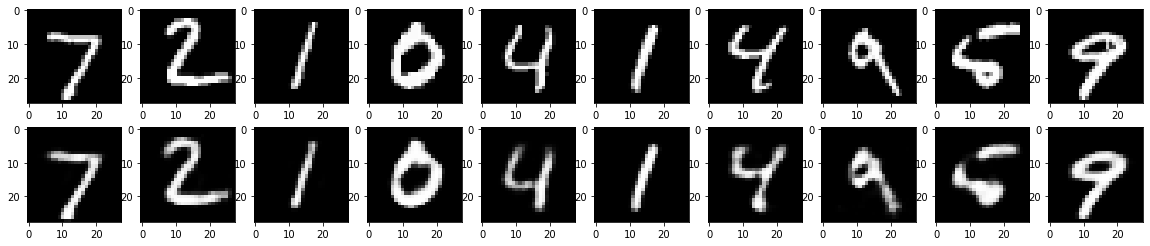

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  plt.subplot(2, n, i+1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  plt.subplot(2, n , i+1+n)
  plt.imshow(decoded[i].reshape(28, 28))
  plt.gray()

### Denoising Autoencoder

In [ ]:
noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(size=x_test.shape)

In [ ]:
x_train_noisy.shape == x_train.shape, x_test_noisy.shape == x_test.shape

(True, True)

After adding noise, there may be some values that are less than 0 and greater than 1. So, we clip the values. Values smaller than 0 become 0, and values larger than 1 become 1.

In [ ]:
x_train_noisy = np.clip(x_train_noisy, 0, 1)
x_test_noisy = np.clip(x_test_noisy, 0, 1)

In [ ]:
autoencoder = Model(input_img_layer, output_img_layer)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

In [ ]:
autoencoder.fit(x_train_noisy, x_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1087
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1070
Epoch 3/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1059
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1050
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1044


In [ ]:
decoded = autoencoder.predict(x_test_noisy)


313/313 [==============================] - 1s 3ms/step


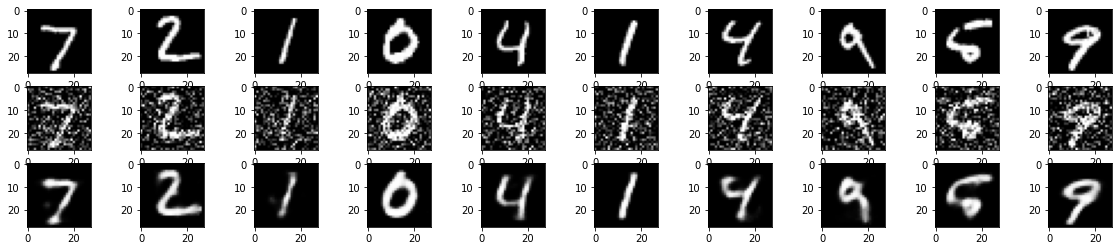

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  plt.subplot(3, n, i+1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()

  plt.subplot(3, n, i+1+n)
  plt.imshow(x_test_noisy[i].reshape(28, 28))
  plt.gray()

  plt.subplot(3, n , i+1+2*n)
  plt.imshow(decoded[i].reshape(28, 28))
  plt.gray()